In [3]:
library('magrittr')
library('tibble')
library('dplyr')
library('tidyr')
library('ggplot2')
library('RColorBrewer')
library('readr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract



In [4]:
bead_flow <- 
    read_tsv(
        'beads.tsv',
        col_types=cols(
            `Sample:`=col_character(),
            `Replicate`=col_factor(levels=c('Rep1', 'Rep2', 'Rep3', 'Rep4')),
            `Bead:Cell`=col_factor(levels=c('3', '1', '0.3', '0.1', '0.03', '0.01')),
            .default=col_double()
        )
    )

bead_flow %>% head

Sample:,Bead:Cell,Replicate,Count,Beads | Freq. of Parent,Cells + beads | Freq. of Parent,Cells + beads/CD45RO+ | Freq. of Parent,Cells + beads/CD45RO- | Freq. of Parent,Cells stuck on beads
1.fcs,3,Rep1,902000,57.90,4.58,82.6,17.4,41300
2.fcs,1,Rep1,690000,30.10,7.14,84.1,15.9,49300
3.fcs,0.3,Rep1,515000,6.96,6.39,83.7,16.3,32900
4.fcs,0.1,Rep1,494000,2.29,2.86,84.4,15.6,14100
5.fcs,0.03,Rep1,471000,0.81,1.44,85.0,15.0,6780
6.fcs,0.01,Rep1,515000,0.18,0.35,82.4,17.6,1800


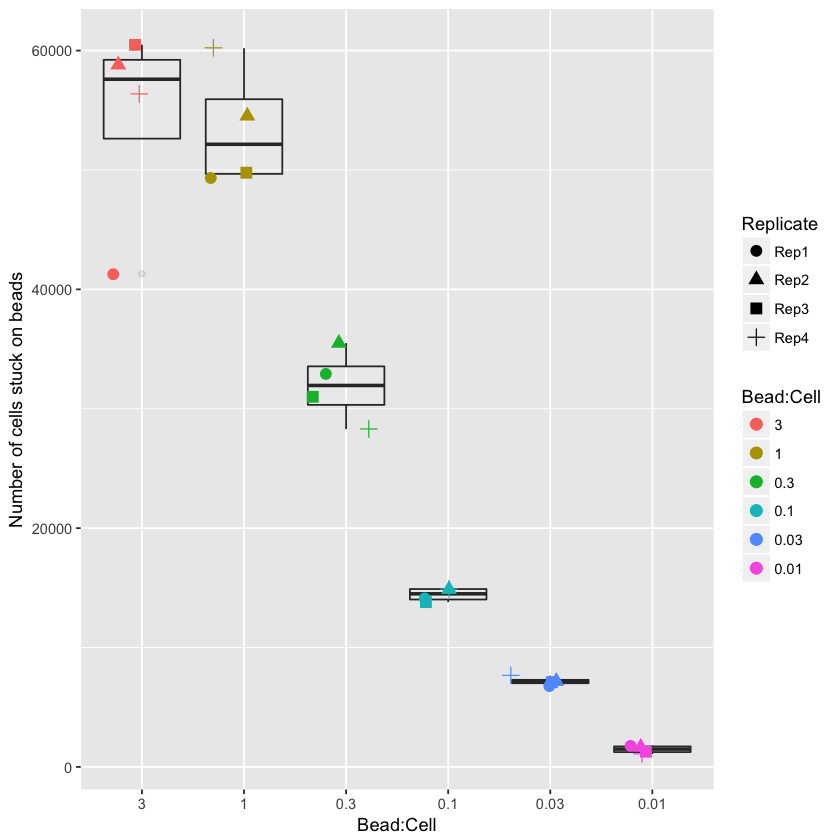

In [25]:
bead_flow %>%
    ggplot(aes(x=`Bead:Cell`, y=`Cells stuck on beads`)) +
        geom_boxplot(alpha=.1) +
        geom_jitter(aes(shape=`Replicate`, color=`Bead:Cell`), size=3, width=.4) +
        ylab('Number of cells stuck on beads')

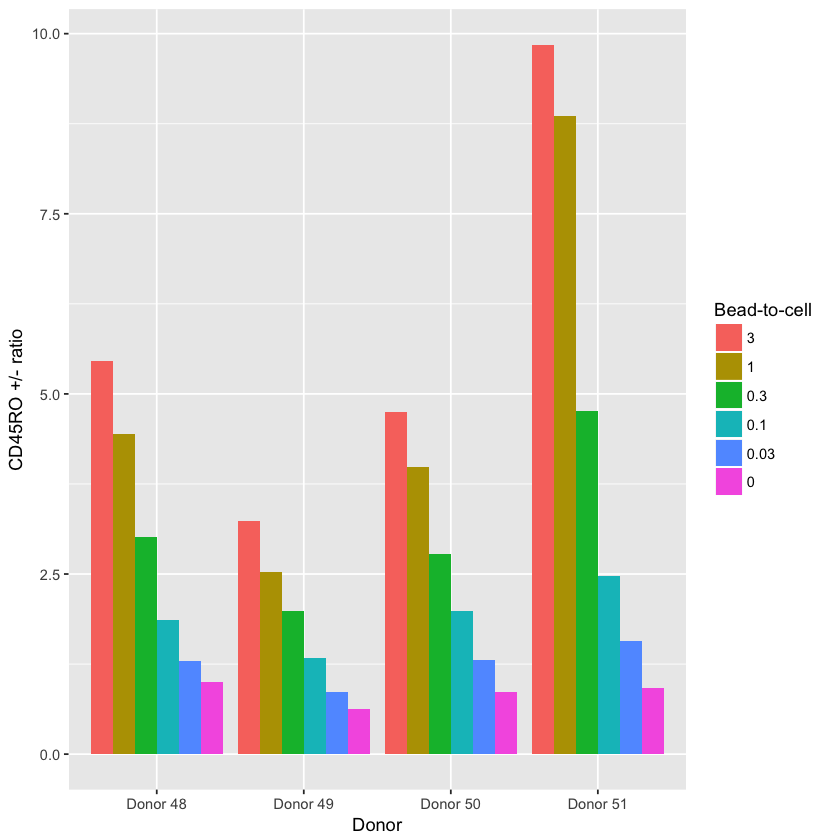

In [6]:
conf_flow %>%
    mutate(
        `CD45RO+` = `Live/CCR7+ CD45RO+ | Freq. of Parent` + `Live/CCR7- CD45RO+ | Freq. of Parent`,
        `CD45RO-` = `Live/CCR7+ CD45RO- | Freq. of Parent` + `Live/CCR7- CD45RO- | Freq. of Parent`,
        `CD45RO +/- ratio` = `CD45RO+` / `CD45RO-`
    ) %>%
    ggplot(aes(x=`Donor`, y=`CD45RO +/- ratio`, fill=`Bead-to-cell`)) +
        geom_col(pos="dodge")

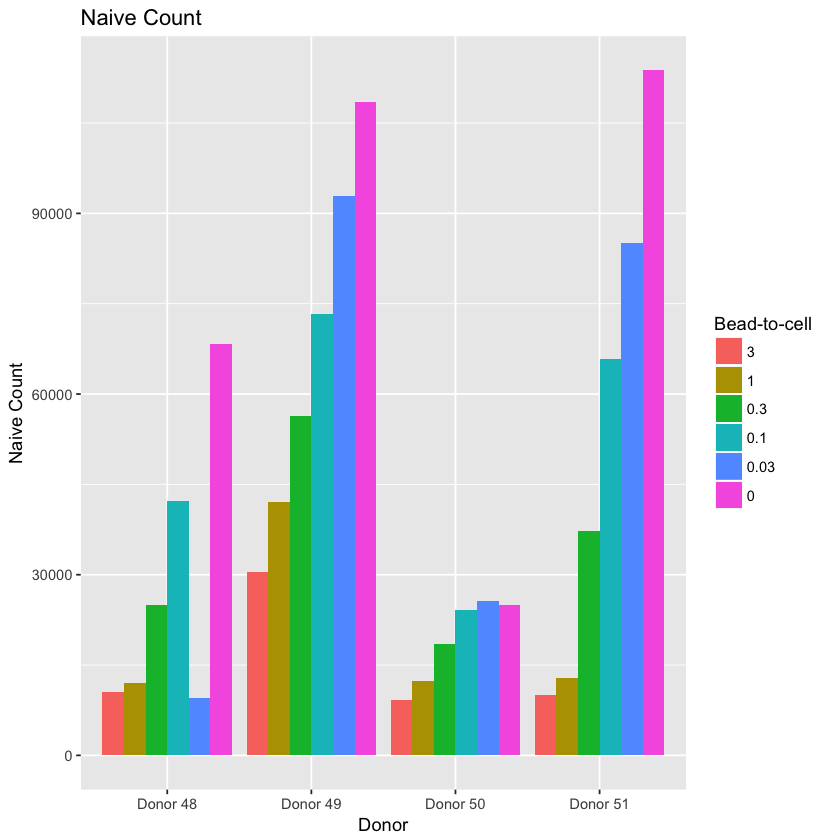

In [14]:
conf_flow %>%
    mutate(
        `Naive Count` = `Count` * (`Live | Freq. of Parent` / 100) * (`Live/CCR7+ CD45RO- | Freq. of Parent` / 100),
        `CM Count` = `Count` * (`Live | Freq. of Parent` / 100) * (`Live/CCR7+ CD45RO+ | Freq. of Parent` / 100)
    ) %>%
    ggplot(aes(x=`Donor`, y=`Naive Count`, fill=`Bead-to-cell`)) +
        geom_col(pos="dodge") +
        ggtitle('Naive Count')

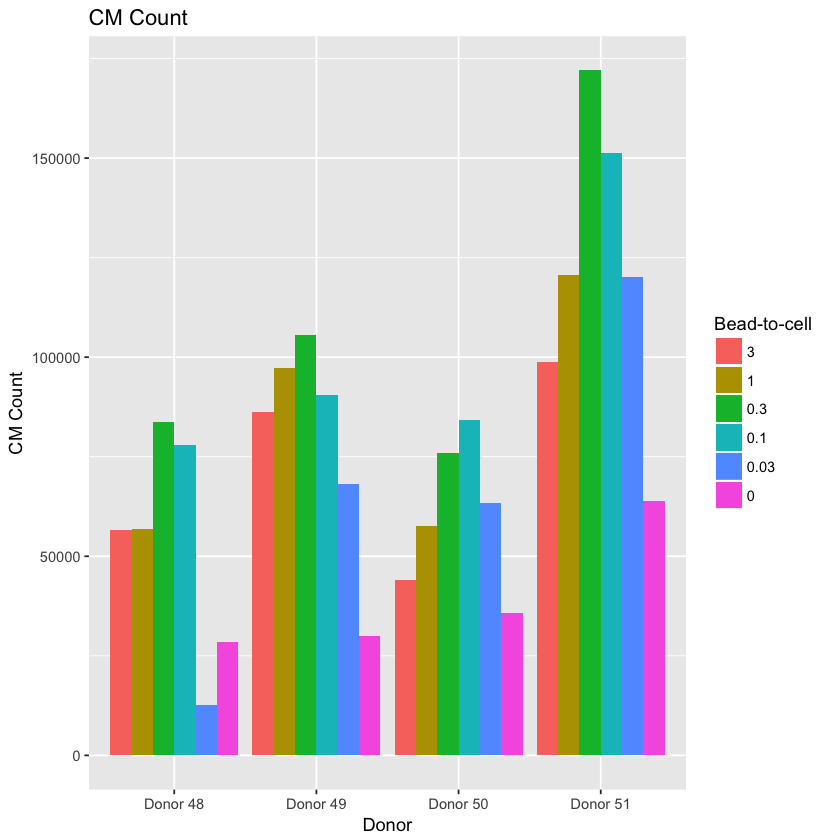

In [13]:
conf_flow %>%
    mutate(
        `Naive Count` = `Count` * (`Live | Freq. of Parent` / 100) * (`Live/CCR7+ CD45RO- | Freq. of Parent` / 100),
        `CM Count` = `Count` * (`Live | Freq. of Parent` / 100) * (`Live/CCR7+ CD45RO+ | Freq. of Parent` / 100)
    ) %>%
    ggplot(aes(x=`Donor`, y=`CM Count`, fill=`Bead-to-cell`)) +
        geom_col(pos="dodge") +
        ggtitle('CM Count')